In [52]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import pandas_ta as ta
data = yf.download(tickers = 'EURUSD=x', start = '2012-03-11',end = '2022-07-10')
data.head(10)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-03-12,1.312164,1.314660,1.308216,1.312508,1.312508,0
2012-03-13,1.317176,1.318913,1.305330,1.316829,1.316829,0
2012-03-14,1.308044,1.308900,1.301592,1.308044,1.308044,0
2012-03-15,1.302236,1.308289,1.300492,1.302253,1.302253,0
2012-03-16,1.307873,1.318426,1.305057,1.307873,1.307873,0
2012-03-19,1.317697,1.326480,1.314406,1.317714,1.317714,0
2012-03-20,1.322926,1.324940,1.317523,1.322926,1.322926,0
2012-03-21,1.323977,1.328551,1.318270,1.323767,1.323767,0
2012-03-22,1.321807,1.325557,1.314100,1.321877,1.321877,0


In [53]:
# Adding indicators
data['RSI']=ta.rsi(data.Close, length=15)
data['EMAF']=ta.ema(data.Close, length=20)
data['EMAM']=ta.ema(data.Close, length=100)
data['EMAS']=ta.ema(data.Close, length=150)

data['Target'] = data['Adj Close']-data.Open
data['Target'] = data['Target'].shift(-1)

data['TargetClass'] = [1 if data.Target[i]>0 else 0 for i in range(len(data))]

data['TargetNextClose'] = data['Adj Close'].shift(-1)

data.dropna(inplace=True)
data.reset_index(inplace = True)
data.drop(['Volume', 'Close', 'Date'], axis=1, inplace=True)

In [54]:
data_set = data.iloc[:, 0:11]#.values
pd.set_option('display.max_columns', None)

data_set.head(20)
#print(data_set.shape)
#print(data.shape)
#print(type(data_set))

,Open,High,Low,Adj Close,RSI,EMAF,EMAM,EMAS,Target,TargetClass,TargetNextClose
0,1.301575,1.307190,1.299714,1.301744,63.578882,1.287713,1.273249,1.273568,0.000000,0,1.301575
1,1.301575,1.301575,1.294049,1.301575,63.431906,1.289033,1.273810,1.273939,0.000000,0,1.297690
2,1.297690,1.299300,1.286836,1.297690,60.022433,1.289858,1.274283,1.274253,0.000000,0,1.285843
3,1.285843,1.291206,1.283977,1.285843,51.055962,1.289475,1.274512,1.274407,-0.000165,0,1.285843
4,1.286008,1.295169,1.283038,1.285843,51.055962,1.289129,1.274736,1.274558,0.000000,0,1.293326
5,1.293326,1.299039,1.292491,1.293326,55.839662,1.289529,1.275104,1.274807,0.000167,1,1.294331
6,1.294163,1.298027,1.289823,1.294331,56.451686,1.289986,1.275485,1.275065,0.000000,0,1.296849
7,1.296849,1.306199,1.295337,1.296849,58.014623,1.290640,1.275908,1.275354,0.000000,0,1.310788
8,1.310788,1.313781,1.308729,1.310788,65.383874,1.292559,1.276599,1.275823,0.000000,0,1.311648
9,1.311648,1.312899,1.308260,1.311648,65.780781,1.294377,1.277293,1.276298,-0.000103,0,1.306916


In [55]:
#Target column Categories
#y =[1 if data.Open[i]>data.Close[i] else 0 for i in range(0, len(data))]
#yi = [data.Open[i]-data.Close[i] for i in range(0, len(data))]
#print(yi)
#print(len(yi))

In [56]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
data_set_scaled = sc.fit_transform(data_set)
print(data_set_scaled)

[[0.75580157 0.75630156 0.75648094 ... 0.49851485 0.         0.75668275]
 [0.75580157 0.74141612 0.74141236 ... 0.49851485 0.         0.74635339]
 [0.7454238  0.73538565 0.7222233  ... 0.49851485 0.         0.71485375]
 ...
 [0.06592108 0.06080625 0.02234078 ... 0.49851485 0.         0.02335445]
 [0.01903626 0.01450207 0.00236022 ... 0.49851485 0.         0.00440699]
 [0.         0.         0.         ... 0.49851485 0.         0.        ]]


In [57]:
# multiple feature from data provided to the model
X = []
#print(data_set_scaled[0].size)
#data_set_scaled=data_set.values
backcandles = 30
print(data_set_scaled.shape[0])
for j in range(8):#data_set_scaled[0].size):#2 columns are target not X
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):#backcandles+2
        X[j].append(data_set_scaled[i-backcandles:i, j])

#move axis from 0 to position 2
X=np.moveaxis(X, [0], [2])

#Erase first elements of y because of backcandles to match X length
#del(yi[0:backcandles])
#X, yi = np.array(X), np.array(yi)
# Choose -1 for last column, classification else -2...
X, yi =np.array(X), np.array(data_set_scaled[backcandles:,-3])
y=np.reshape(yi,(len(yi),1))
#y=sc.fit_transform(yi)
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X)
print(X.shape)
print(y)
print(y.shape)

2540
[[[0.75580157 0.75630156 0.75648094 ... 0.71210136 0.66800326 0.67756551]
  [0.75580157 0.74141612 0.74141236 ... 0.71600697 0.66984505 0.67883232]
  [0.7454238  0.73538565 0.7222233  ... 0.71844604 0.67139777 0.67990663]
  ...
  [0.67404905 0.66353739 0.66854542 ... 0.70664518 0.69237959 0.69602958]
  [0.67448086 0.67308166 0.67916278 ... 0.70244775 0.69174875 0.69566757]
  [0.67932184 0.6848689  0.6827743  ... 0.69928843 0.69127772 0.69541284]]

 [[0.75580157 0.74141612 0.74141236 ... 0.71600697 0.66984505 0.67883232]
  [0.7454238  0.73538565 0.7222233  ... 0.71844604 0.67139777 0.67990663]
  [0.71377652 0.7139252  0.71461972 ... 0.71731488 0.67214941 0.68043085]
  ...
  [0.67448086 0.67308166 0.67916278 ... 0.70244775 0.69174875 0.69566757]
  [0.67932184 0.6848689  0.6827743  ... 0.69928843 0.69127772 0.69541284]
  [0.69357921 0.68009566 0.67577322 ... 0.6978976  0.6911547  0.69539709]]

 [[0.7454238  0.73538565 0.7222233  ... 0.71844604 0.67139777 0.67990663]
  [0.71377652 0.7

In [58]:
#also comprehensions for X
#X = np.array([data_set_scaled[i-backcandles:i,:4].copy() for i in range(backcandles,len(data_set_scaled))])
#print(X)
#print(X.shape)

In [59]:
# split data into train test sets
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)

2008
(2008, 30, 8)
(502, 30, 8)
(2008, 1)
(502, 1)
[[0.4850165 ]
 [0.57075908]
 [0.51214521]
 ...
 [0.44854785]
 [0.57514851]
 [0.5139934 ]]


In [60]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed

import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
import numpy as np
#tf.random.set_seed(20)
np.random.seed(10)

lstm_input = Input(shape=(backcandles, 8), name='lstm_input')
inputs = LSTM(150, name='first_layer')(lstm_input)
inputs = Dense(1, name='dense_layer')(inputs)
output = Activation('linear', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()
model.compile(optimizer=adam, loss='mse')
model.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_split = 0.1)

Epoch 1/30


2023-06-29 14:26:29.748975: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-29 14:26:29.749883: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-29 14:26:29.750468: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

121/121 [==============================] - 2s 10ms/step - loss: 0.0182 - val_loss: 0.0056
Epoch 2/30
  8/121 [>.............................] - ETA: 0s - loss: 0.0020

2023-06-29 14:26:31.767622: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-29 14:26:31.768485: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-29 14:26:31.769103: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

121/121 [==============================] - 1s 8ms/step - loss: 0.0037 - val_loss: 0.0057
Epoch 3/30
121/121 [==============================] - 1s 7ms/step - loss: 0.0036 - val_loss: 0.0045
Epoch 4/30
121/121 [==============================] - 1s 8ms/step - loss: 0.0038 - val_loss: 0.0044
Epoch 5/30
121/121 [==============================] - 1s 8ms/step - loss: 0.0034 - val_loss: 0.0044
Epoch 6/30
121/121 [==============================] - 1s 8ms/step - loss: 0.0034 - val_loss: 0.0047
Epoch 7/30
121/121 [==============================] - 1s 8ms/step - loss: 0.0035 - val_loss: 0.0047
Epoch 8/30
121/121 [==============================] - 1s 8ms/step - loss: 0.0034 - val_loss: 0.0056
Epoch 9/30
121/121 [==============================] - 1s 9ms/step - loss: 0.0034 - val_loss: 0.0044
Epoch 10/30
121/121 [==============================] - 1s 9ms/step - loss: 0.0034 - val_loss: 0.0045
Epoch 11/30
121/121 [==============================] - 1s 10ms/step - loss: 0.0035 - val_loss: 0.0054
Epoch 12

In [61]:
y_pred = model.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(10):
    print(y_pred[i], y_test[i])

16/16 [==============================] - 0s 4ms/step
[0.52299744] [0.47508251]
[0.5211959] [0.53755776]
[0.5207004] [0.50623762]
[0.52153295] [0.50234323]
[0.5249589] [0.4069637]
[0.5251566] [0.42419142]
[0.5243997] [0.43273927]
[0.5225095] [0.55683168]
[0.52271575] [0.42036304]
[0.5220395] [0.51432343]


2023-06-29 14:27:01.791833: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-29 14:27:01.793136: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-29 14:27:01.793959: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

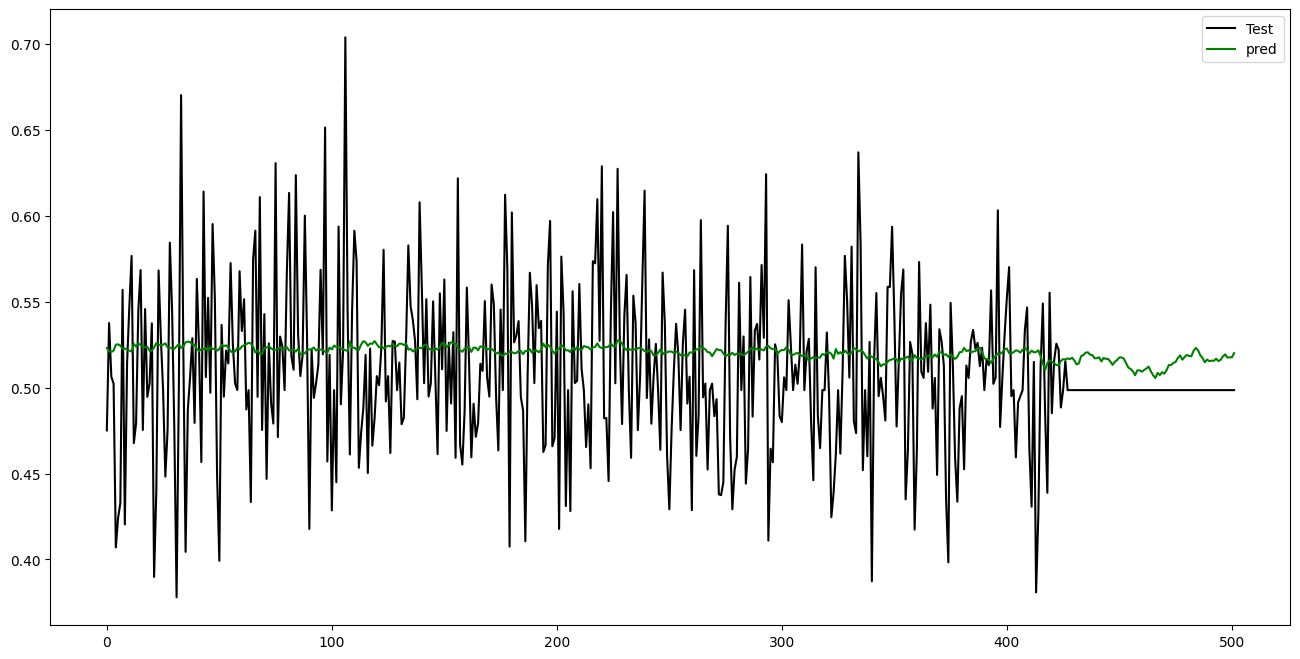

In [62]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.legend()
plt.show()

In [63]:
df = pd.DataFrame({"prediction": y_pred.reshape(-1), "real": y_test.reshape(-1)})
df

,prediction,real
0,0.522997,0.475083
1,0.521196,0.537558
2,0.520700,0.506238
3,0.521533,0.502343
4,0.524959,0.406964
...,...,...
497,0.519330,0.498515
498,0.517458,0.498515
499,0.517587,0.498515
500,0.517580,0.498515


In [64]:
df['prediction_diff'] = df.prediction.diff(periods=2)
df['real_diff'] = df.real.diff(periods=2)
def is_trade(row):
    if row >= 0:
        return 1
    if row <= 0:
        return -1
df.dropna(inplace=True)
df['prediction_tendency'] = df['prediction_diff'].apply(is_trade).astype('int')
df['real_tendency'] = df['real_diff'].apply(is_trade).astype('int')
    
df.dropna(inplace=True)
df.reset_index(drop=True)

,prediction,real,prediction_diff,real_diff,prediction_tendency,real_tendency
0,0.520700,0.506238,-0.002297,0.031155,-1,1
1,0.521533,0.502343,0.000337,-0.035215,1,-1
2,0.524959,0.406964,0.004259,-0.099274,1,-1
3,0.525157,0.424191,0.003624,-0.078152,1,-1
4,0.524400,0.432739,-0.000559,0.025776,-1,1
...,...,...,...,...,...,...
495,0.519330,0.498515,0.003221,0.000000,1,1
496,0.517458,0.498515,-0.000644,0.000000,-1,1
497,0.517587,0.498515,-0.001743,0.000000,-1,1
498,0.517580,0.498515,0.000121,0.000000,1,1


In [65]:
len(df[df.prediction_tendency == df.real_tendency])/len(df)*100

50.2

<AxesSubplot: >

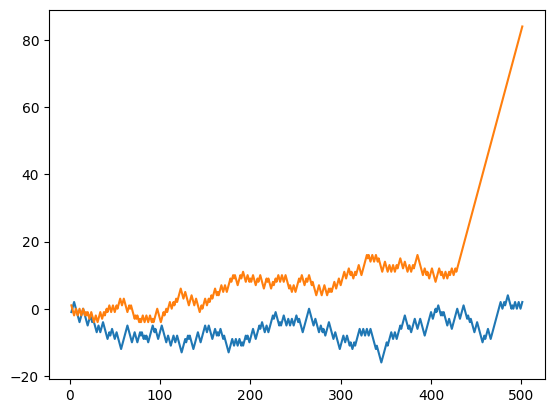

In [66]:
ax = df.prediction_tendency.cumsum().plot()

df.real_tendency.cumsum().plot(ax=ax)

In [74]:
abs(df.prediction_tendency.cumsum() - df.real_tendency.cumsum())[:-100].mean()

/tmp/ipykernel_30991/3532618687.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  abs(df.prediction_tendency.cumsum() - df.real_tendency.cumsum())[:-100].mean()


12.695